In [34]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import random as random
from scipy.stats import linregress
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [35]:
# Import csv file
file = "/Users/mdcummings/Desktop/Data Analysis/My Projects/Haikus in Harmony/Haikus_in_Harmony/haikus.csv"

In [58]:
# Read the csv file
df1 = pd.read_csv(file, delimiter=',')

In [59]:
# Display the csv file as a dataframe
df1

,Johannes Brahms,Ludwig Beethoven,Johann Sebastian Bach,Samuel Barber,Bela Bartok,Antonin Dvorak,Wolfgang Amadeus Mozart,John Cage,John Williams,Antonio Vivaldi
0,In,Deafness,Harmony,Adagio's,Folklore,From,Child,Silence,Soundtracks,Seasons
1,lush,could,unfolds,tears,Comes,Bohemian,prodigy's,speaks,of,come
2,symphony,not,Baroque,fall,alive,lands,gift,volumes,the,alive
3,Melodies,Bind,notes,Elegy,Hungarian,Symphonic,Classical,Chance,heart,Vivaldi's
4,dance,heart’s,in,of,roots,tales,brilliance,and,Imagination,concertos
5,with,turmoil,perfect,haunting,embraced,enchant,shines,noise,takes,bloom
6,passion,And,Grace,grace,Bartok’s,all,bright,become,flight,Nature’s
7,Brahms,Triumph,Bach’s,Barber’s,vibrant,Dvorak’s,Mozart’s,art,Williams’,symphony
8,master's,Roared,eternal,mournful,voice,rich,timeless,forms,magic,NaN
9,touch,Beethoven,gift,soul,NaN,landscapes,grace,Cage,soar,NaN


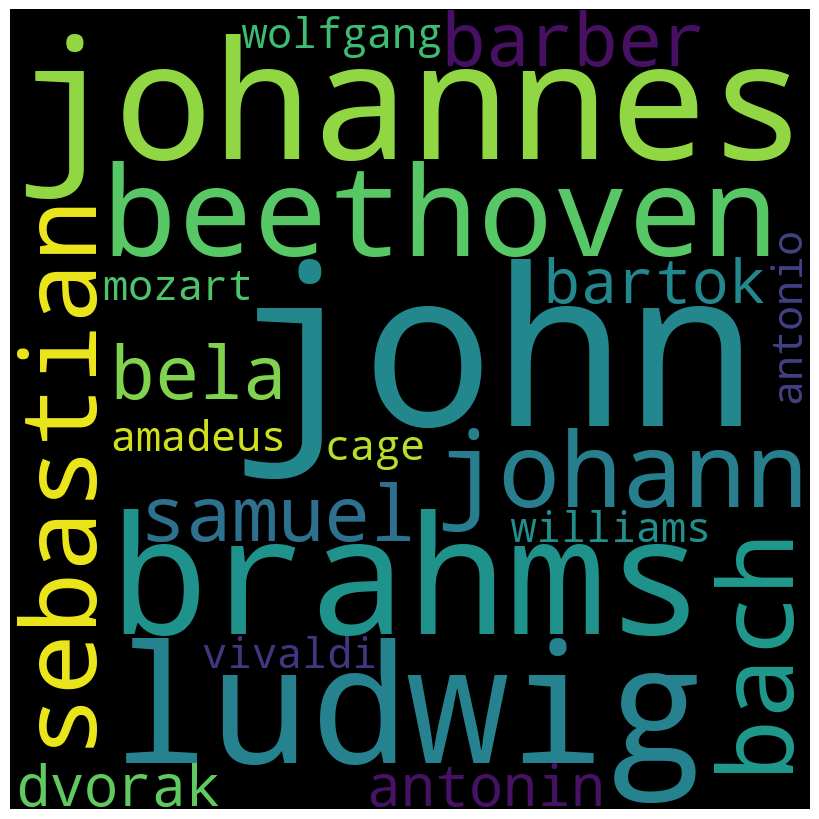

In [60]:
# Display a WordCloud of the most prevalent words used

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the data frame
for val in df1:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [45]:
# Dataframe for the 2nd set of haikus, where I prompted ChatGPT to write haikus without using the composer's name in the body
# Also prompted ChatGPT to provide the haikus in a Pandas DataFrame object and add NaN values to ensure each column length was the same

data = {
    'Haiku 1': [
        'Gentle', 'melodies,', 'Embrace', 'the', 'soul', 'with', 'warmth', 'and',
        'Tales', 'of', 'tender', 'love.'
    ],
    'Haiku 2': [
        'Thunderous', 'triumph,', 'Deaf', 'ears', 'hear', 'symphonic', 'storms,',
        'Rebel', 'against', 'fate.'
    ],
    'Haiku 3': [
        'Baroque', 'architecture,', 'Notes', 'weave', 'intricate', 'patterns,',
        'Eternity\'s', 'gift.'
    ],
    'Haiku 4': [
        'Whispers', 'of', 'sorrow,', 'Melancholic', 'melodies,', 'Aching', 'hearts', 'embrace.'
    ],
    'Haiku 5': [
        'Folklore\'s', 'vibrant', 'pulse,', 'Harmony', 'of', 'ancient', 'lands,',
        'Echoes', 'of', 'the', 'past.'
    ],
    'Haiku 6': [
        'Bohemian', 'rhapsody,', 'Nature\'s', 'beauty', 'sings', 'and', 'soars,',
        'Symphonic', 'journey.'
    ],
    'Haiku 7': [
        'Childhood', 'dreams', 'take', 'flight,', 'Genius', 'in', 'playful', 'notes,',
        'Unmatched', 'legacy.'
    ],
    'Haiku 8': [
        'Silent', 'symphony,', 'Chaos', 'finds', 'harmony\'s', 'grace,', 'Chance', 'creates', 'anew.'
    ],
    'Haiku 9': [
        'Cinematic', 'dreams,', 'Orchestral', 'tales', 'unfold,', 'Imagination', 'soars.'
    ],
    'Haiku 10': [
        'Seasons', 'in', 'motion,', 'Vibrant', 'concertos', 'embrace,', 'Nature\'s', 'symphony.'
    ]
}

# Determine the maximum length of the haikus
max_length = max(len(haiku) for haiku in data.values())

# Add NaN values to ensure all columns have the same length
data = {k: v + [np.nan] * (max_length - len(v)) for k, v in data.items()}

df2 = pd.DataFrame(data)

print(df2)


      Haiku 1     Haiku 2        Haiku 3      Haiku 4     Haiku 5    Haiku 6  \
0      Gentle  Thunderous        Baroque     Whispers  Folklore's   Bohemian   
1   melodies,    triumph,  architecture,           of     vibrant  rhapsody,   
2     Embrace        Deaf          Notes      sorrow,      pulse,   Nature's   
3         the        ears          weave  Melancholic     Harmony     beauty   
4        soul        hear      intricate    melodies,          of      sings   
5        with   symphonic      patterns,       Aching     ancient        and   
6      warmth     storms,     Eternity's       hearts      lands,     soars,   
7         and       Rebel          gift.     embrace.      Echoes  Symphonic   
8       Tales     against            NaN          NaN          of   journey.   
9          of       fate.            NaN          NaN         the        NaN   
10     tender         NaN            NaN          NaN       past.        NaN   
11      love.         NaN            NaN

In [62]:
# Extract columns from the first df and join them into the second
extracted_col = df2[["Haiku 1", "Haiku 2", "Haiku 3", "Haiku 4", "Haiku 5", "Haiku 6", "Haiku 7", "Haiku 8", "Haiku 9", "Haiku 10"]]
df_12 = df1.join(extracted_col)
df_12

,Johannes Brahms,Ludwig Beethoven,Johann Sebastian Bach,Samuel Barber,Bela Bartok,Antonin Dvorak,Wolfgang Amadeus Mozart,John Cage,John Williams,Antonio Vivaldi,Haiku 1,Haiku 2,Haiku 3,Haiku 4,Haiku 5,Haiku 6,Haiku 7,Haiku 8,Haiku 9,Haiku 10
0,In,Deafness,Harmony,Adagio's,Folklore,From,Child,Silence,Soundtracks,Seasons,Gentle,Thunderous,Baroque,Whispers,Folklore's,Bohemian,Childhood,Silent,Cinematic,Seasons
1,lush,could,unfolds,tears,Comes,Bohemian,prodigy's,speaks,of,come,"melodies,","triumph,","architecture,",of,vibrant,"rhapsody,",dreams,"symphony,","dreams,",in
2,symphony,not,Baroque,fall,alive,lands,gift,volumes,the,alive,Embrace,Deaf,Notes,"sorrow,","pulse,",Nature's,take,Chaos,Orchestral,"motion,"
3,Melodies,Bind,notes,Elegy,Hungarian,Symphonic,Classical,Chance,heart,Vivaldi's,the,ears,weave,Melancholic,Harmony,beauty,"flight,",finds,tales,Vibrant
4,dance,heart’s,in,of,roots,tales,brilliance,and,Imagination,concertos,soul,hear,intricate,"melodies,",of,sings,Genius,harmony's,"unfold,",concertos
5,with,turmoil,perfect,haunting,embraced,enchant,shines,noise,takes,bloom,with,symphonic,"patterns,",Aching,ancient,and,in,"grace,",Imagination,"embrace,"
6,passion,And,Grace,grace,Bartok’s,all,bright,become,flight,Nature’s,warmth,"storms,",Eternity's,hearts,"lands,","soars,",playful,Chance,soars.,Nature's
7,Brahms,Triumph,Bach’s,Barber’s,vibrant,Dvorak’s,Mozart’s,art,Williams’,symphony,and,Rebel,gift.,embrace.,Echoes,Symphonic,"notes,",creates,NaN,symphony.
8,master's,Roared,eternal,mournful,voice,rich,timeless,forms,magic,NaN,Tales,against,NaN,NaN,of,journey.,Unmatched,anew.,NaN,NaN
9,touch,Beethoven,gift,soul,NaN,landscapes,grace,Cage,soar,NaN,of,fate.,NaN,NaN,the,NaN,legacy.,NaN,NaN,NaN


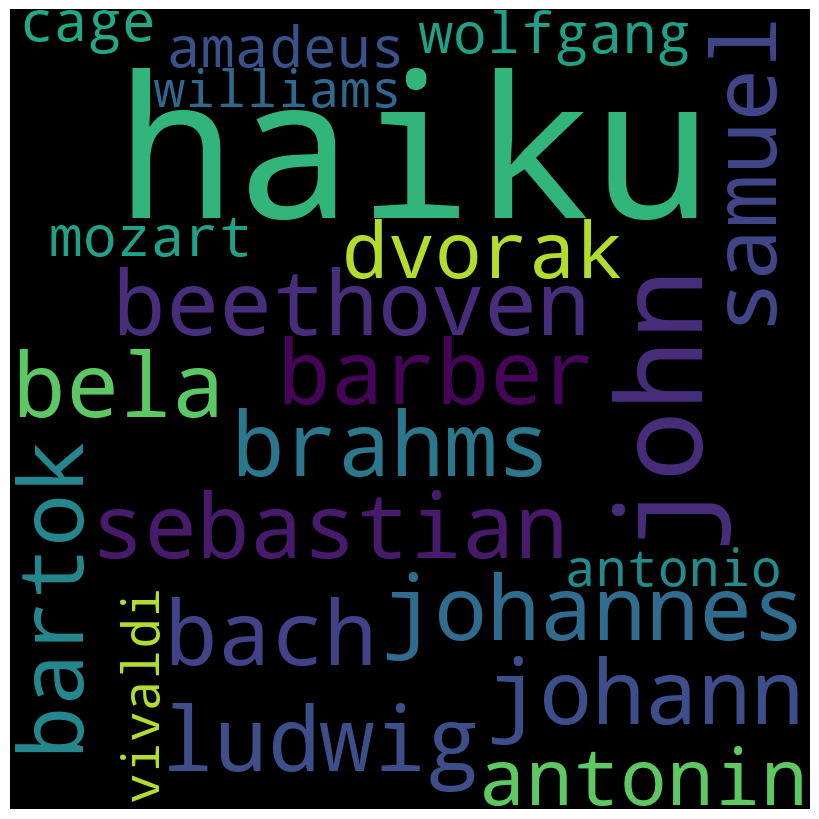

In [63]:
# Display a WordCloud of the most prevalent words used for the 2nd set of haikus

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the data frame
for val in df_12:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()